# SEABORN: Librería de visualización de datos estadísticos de Python
Seaborn complementa a Matplotlib y se dirige específicamente a la visualización de datos estadísticos, funciona muy bien con pandas.

**Instalación Seaborn**<br>
Se instala con el siguiente comando:
```Python
    pip install seaborn
```
**Importar seaborn**<br>
Se importa de forma estandar de la siguiente manera:

In [18]:
import seaborn as sns
#para graficar dentro del jupyter notebook
#%matplotlib inline

#### Datos integrados en seaborn
Seaborn viene con algunos data sets integrados.

In [19]:
# Importar el dataset tips
tips = sns.load_dataset('tips') 
type(tips)

pandas.core.frame.DataFrame

In [20]:
tips.head() # ver los primeros 5 registros

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
tips.dtypes #tipos de datos en el dataframe

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [22]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [23]:
tips.describe() #Resumen estadistico de los datos del data frame por columna


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [24]:
tips.describe(include='all') 

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


### Plots de Distribución en Seaborn
**histplot**<br>
El histplot muestra un histograma (distribución de los datos)

<Axes: xlabel='sex', ylabel='Count'>

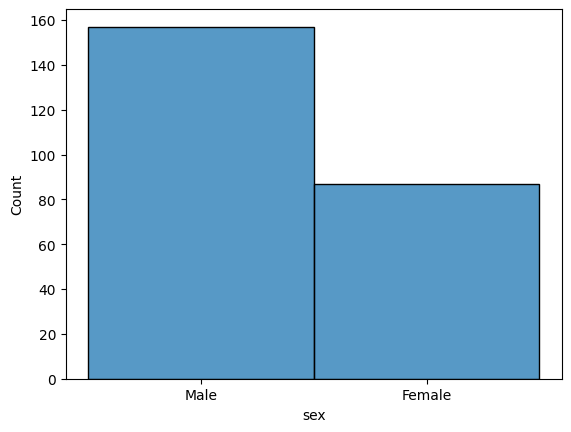

In [25]:
sexo=(tips['sex'])
sns.histplot(sexo)

<Axes: xlabel='total_bill', ylabel='Count'>

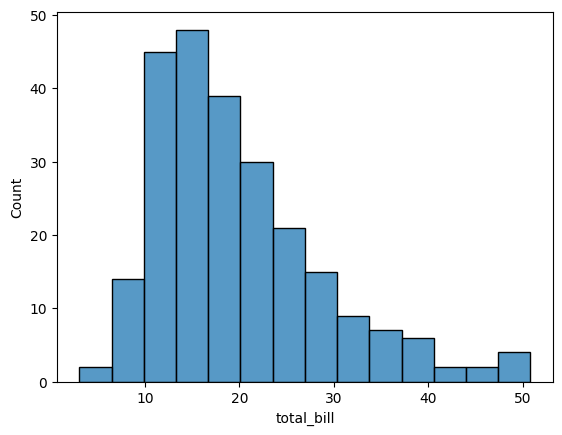

In [26]:
sns.histplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Density'>

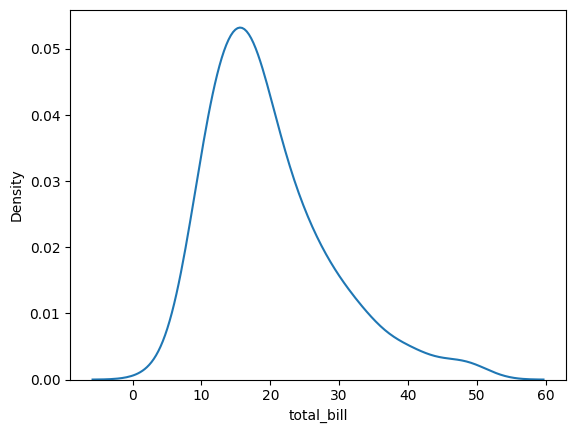

In [27]:
# Crear la curva de densidad (KDE)
sns.kdeplot(tips['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

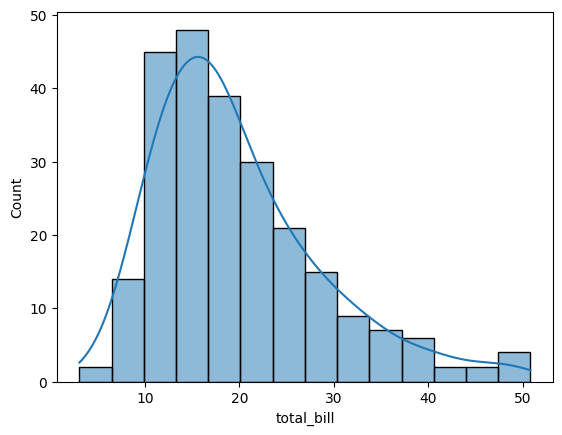

In [28]:
# Crear el histograma con KDE
sns.histplot(tips['total_bill'], kde=True)

**jointplot**<br>
jointplot() le permite básicamente emparejar dos distplots para datos bivariados. Con su elección de que parámetro kind va comparar:
- “scatter”
- “reg”
- “resid”
- “kde”
- “hex”

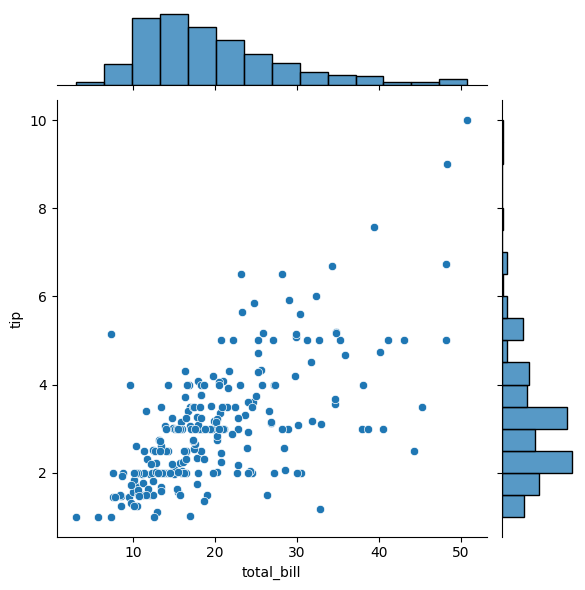

In [29]:
# Histogramas y scatter plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter');

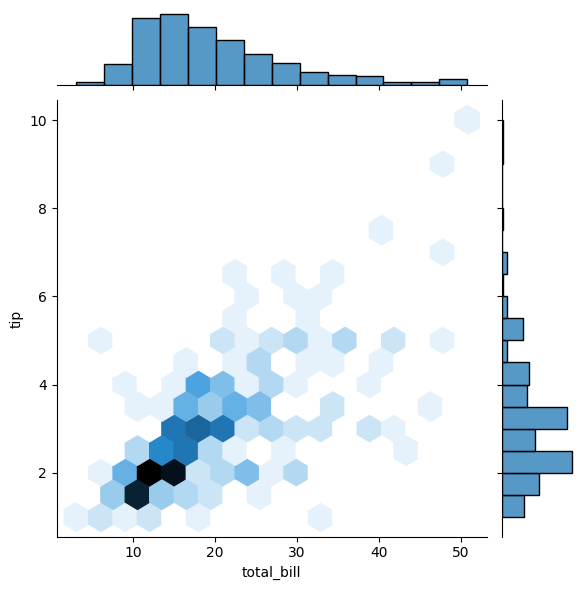

In [30]:
# Histogramas  y hexagonal
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

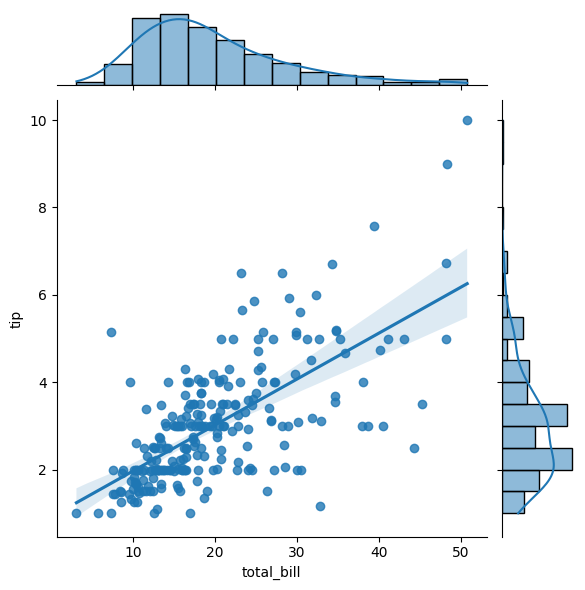

In [31]:
#Hystogramas con kde y scatter plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg');

**pairplot**<br>
pairplot grafica relaciones por pares en un dataframe completo (para las columnas numéricas) y soporta un argumento de tono de color(Hue) (para columnas categóricas).

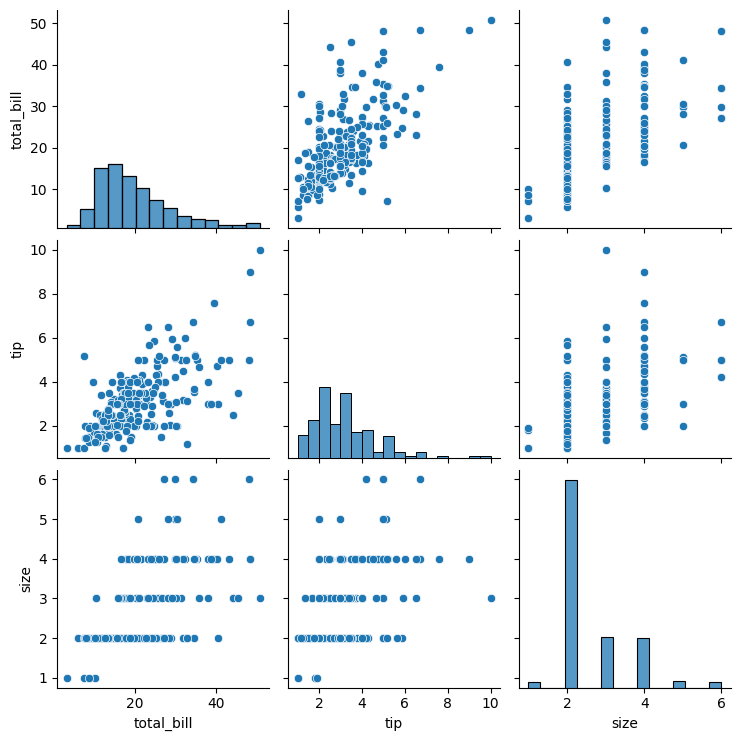

In [32]:
#diagonal histogramas los demás son scatter plots
sns.pairplot(tips); # datos numéricos

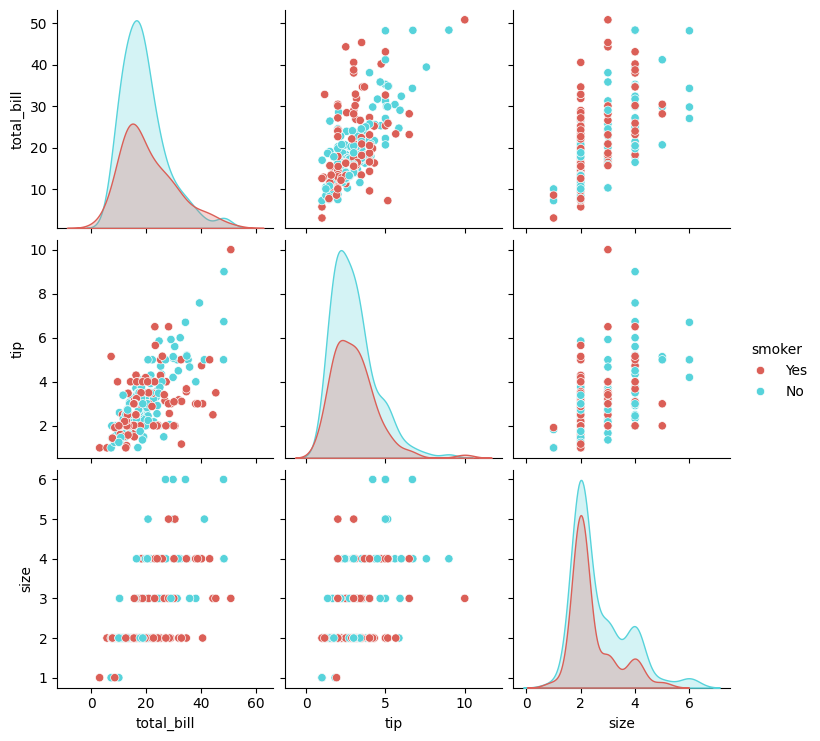

In [33]:
# Datos categóricos

# Diagonal KDE y los otros plots son scatter
sns.pairplot(tips,hue='smoker',palette='hls'); # cambio de colormap

**kdeplot**<br>
kdeplots son Gráficos de Estimación de Densidad del Núcleo.

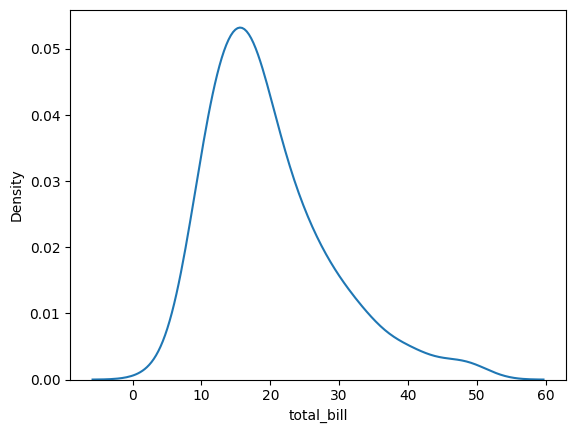

In [34]:
# Variable 'total bill'
sns.kdeplot(tips['total_bill']); #plot kde

<Axes: xlabel='tip', ylabel='Density'>

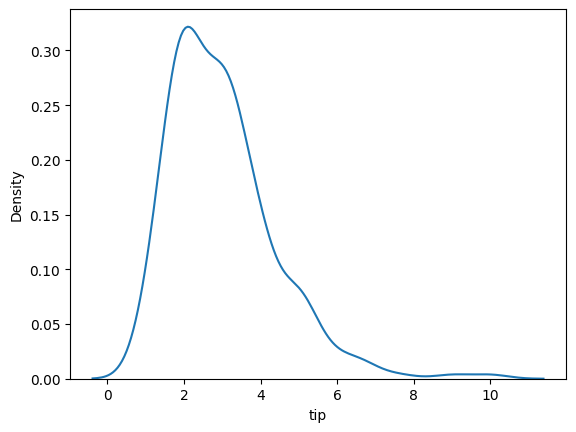

In [35]:
#Variable 'tip'
sns.kdeplot(tips['tip'])

### Plots para datos categóricos
- boxplot
- violinplot
- stripplot
- swarmplot
- barplot
- countplot

**barplot**<br>
Es un gráfico general que le permite agregar los datos categóricos basados en alguna función, el valor predeterminado es la media:

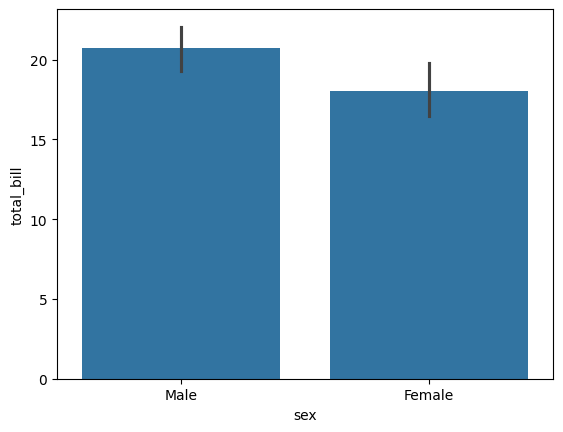

In [36]:
sns.barplot(x='sex',y='total_bill',data=tips);

Puede cambiar el objeto estimador a su propia función, que convierte un vector a escalar:

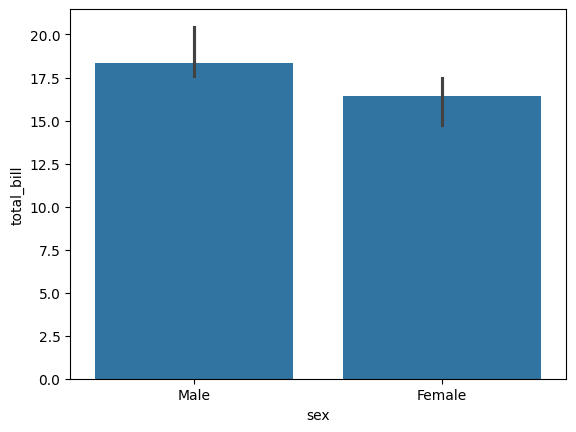

In [37]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.median); # la desviacion estandar como estimador

**countplot**<br>
Esto es esencialmente lo mismo que Barplot, excepto que el estimador está contando explícitamente el número de ocurrencias. Por eso solo pasamos el valor de x:


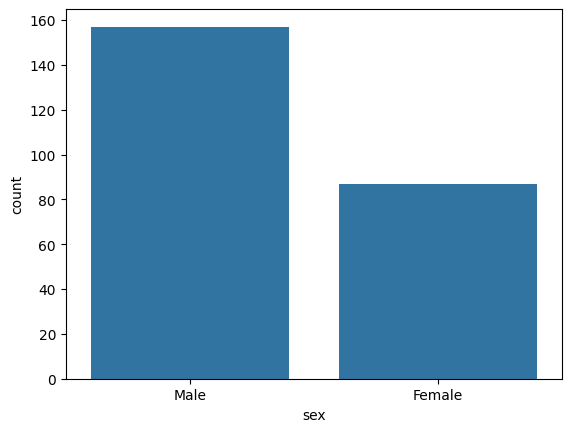

In [38]:
sns.countplot(x='sex',data=tips);

**boxplot**<br>
los boxplots (diagrama de caja) y violin plots se utilizan para mostrar la distribución de datos categóricos. Un diagrama de caja (boxplots o gráfico de caja y bigotes) muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable categórica. El cuadro muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución, a excepción de los puntos que se determinan como “valores atípicos” utilizando un método que es una función del rango intercuartílico.


<Axes: xlabel='day', ylabel='total_bill'>

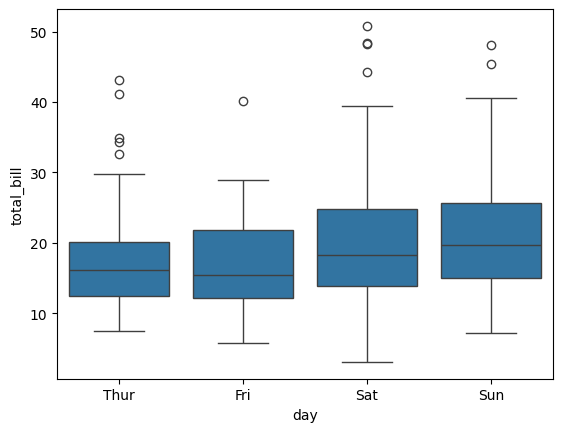

In [39]:
sns.boxplot(x="day", y="total_bill", data=tips)

<Axes: >

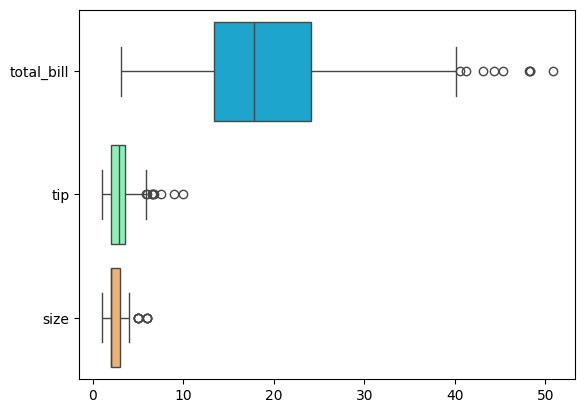

In [40]:
# se pueden graficar de forma horizontal
sns.boxplot(data=tips,palette='rainbow',orient='h')

In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='day', ylabel='total_bill'>

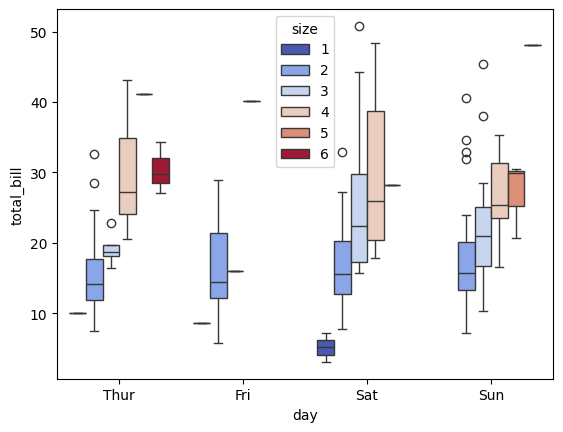

In [42]:
# cambiar el color y ver varias variables (hue)
sns.boxplot(x="day", y="total_bill", hue="size",data=tips, palette="coolwarm")

**violinplot**<br>
Un plot de violín juega un papel similar a un box and whisker plot (diagrama de cajas y bigotes). Muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas de modo que esas distribuciones se puedan comparar. A diferencia de un diagrama de caja, en el que todos los componentes de la gráfica corresponden a los puntos de datos reales, la gráfica del violín presenta una estimación de la densidad del núcleo de la distribución subyacente.


<Axes: xlabel='day', ylabel='total_bill'>

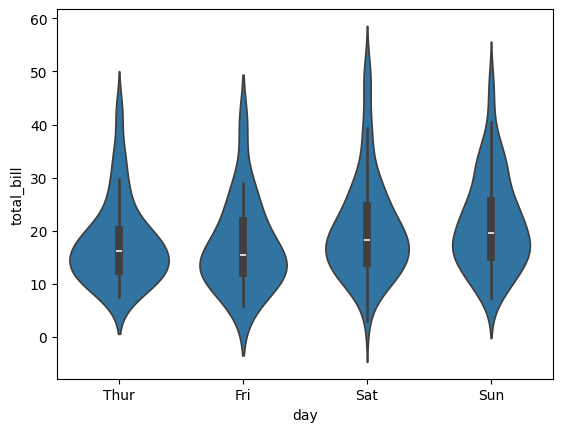

In [43]:
sns.violinplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

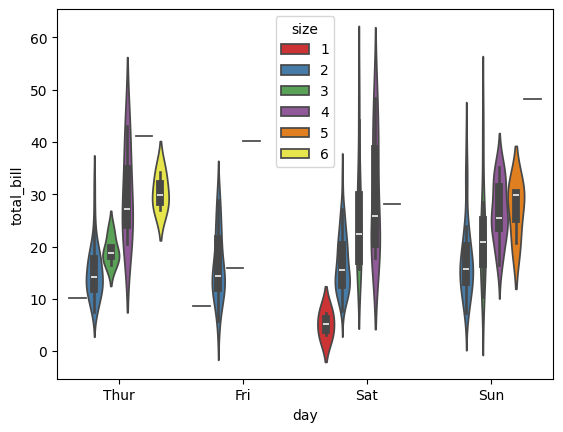

In [44]:
# Varias Variables
sns.violinplot(x="day", y="total_bill", data=tips,hue='size',palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

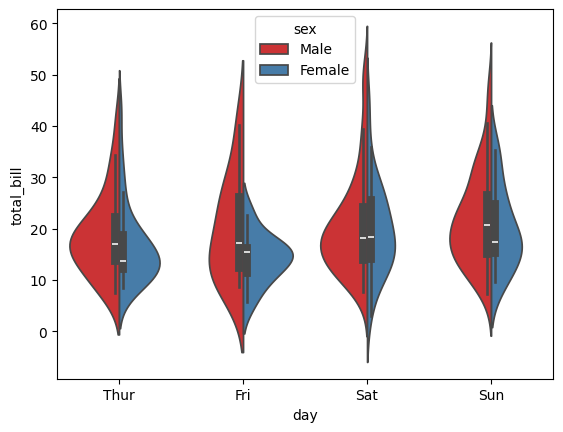

In [45]:
# Varias variables
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

**stripplot**<br>
El stripplot dibujará un diagrama de dispersión donde una variable es categórica. Un stripplot se puede dibujar por sí mismo, pero también es un buen complemento de una casilla o trama de violín en los casos en que desea mostrar todas las observaciones junto con alguna representación de la distribución subyacente.


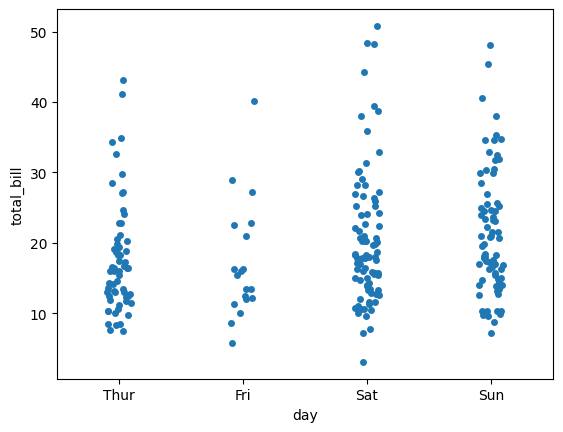

In [46]:
sns.stripplot(x="day", y="total_bill", data=tips);

<Axes: xlabel='day', ylabel='total_bill'>

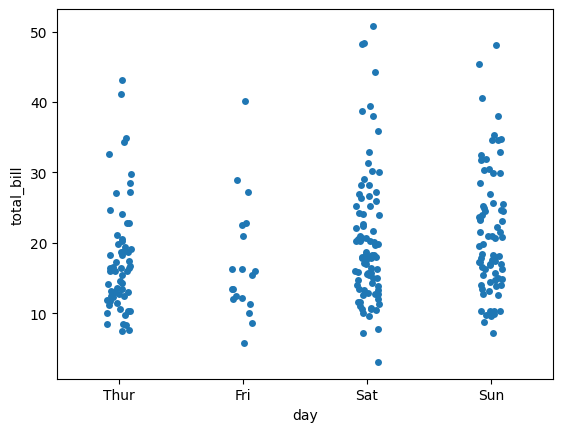

In [47]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)# jitter: espacio entre las categorías

<Axes: xlabel='day', ylabel='total_bill'>

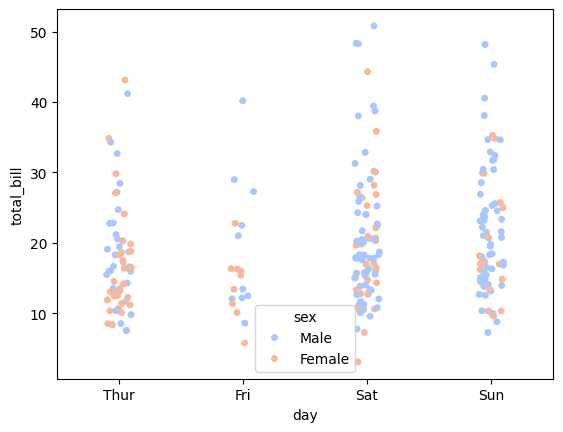

In [48]:
# Varias variables
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='coolwarm')

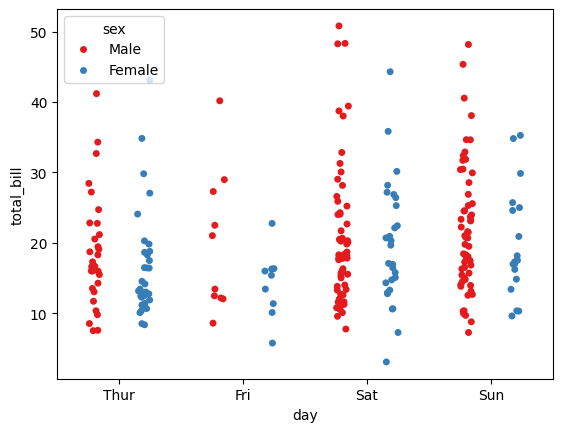

In [49]:
# Varias Variables
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',dodge=True);

**swarmplot**<br>
El swarmplot es similar a stripplot(), pero los puntos se ajustan (solo a lo largo del eje categórico) para que no se superpongan. Esto proporciona una mejor representación de la distribución de los valores, aunque no se ajusta a un gran número de observaciones (tanto en términos de la capacidad de mostrar todos los puntos como en términos del cálculo necesario para organizarlos).

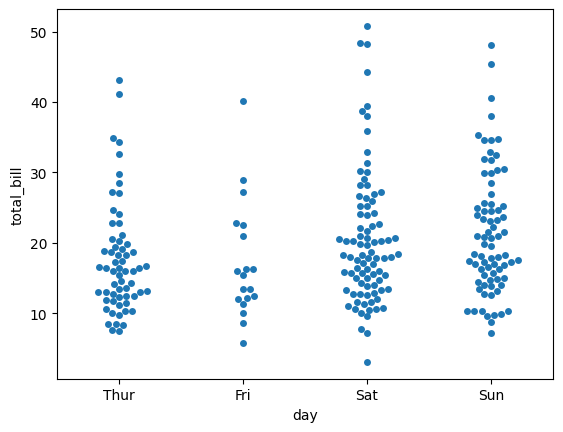

In [50]:
sns.swarmplot(x="day", y="total_bill", data=tips);

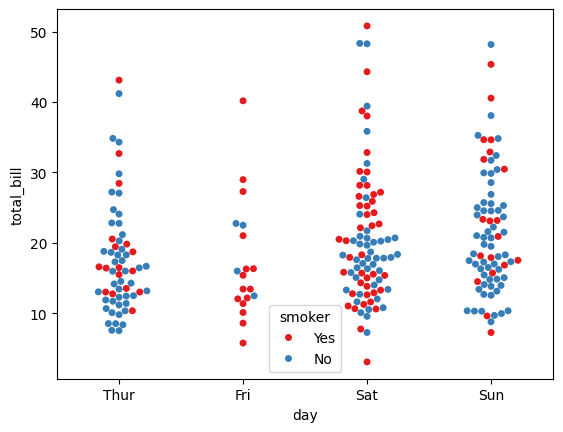

In [51]:
sns.swarmplot(x="day", y="total_bill",hue='smoker',data=tips, palette="Set1", dodge=False);

**Combininando Plots Categóricos**

c:\Users\vik_p\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\vik_p\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='tip', ylabel='day'>

c:\Users\vik_p\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


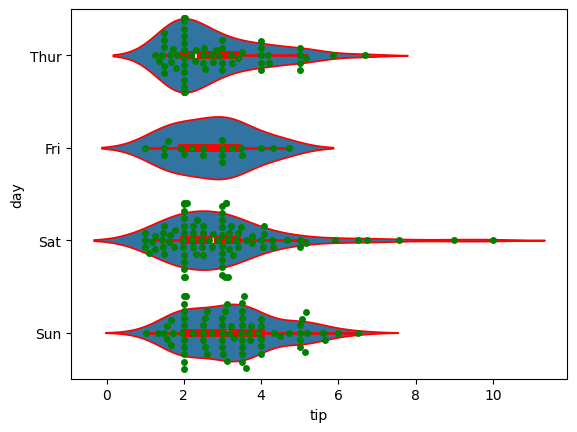

In [52]:
sns.violinplot(x="tip", y="day", data=tips , linecolor='red')
sns.swarmplot(x="tip", y="day", data=tips,color='green',size=5)

**Graficas de Matrices**<br>
Los Plot de matriz permiten graficar los datos como matrices codificadas por colores y también se pueden usar para indicar clústeres dentro de los datos, algunos de los mas usados son el heatmap y el clustermap de seaborn:

In [53]:
flights = sns.load_dataset('flights') # carga de datos
tips = sns.load_dataset('tips') # carga de datos
tips.head() # ver los primeros 5 elementos de la tabla

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
flights.head() # ver los primeros 5 elementos de la tabla

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


**Heatmap**<br>
Para que un mapa de calor funcióne correctamente, los datos ya deben estar en forma de matriz, la función de sns.heatmap básicamente los colorea. Por ejemplo:

In [55]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [56]:
# Matriz de correlación de los datos
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

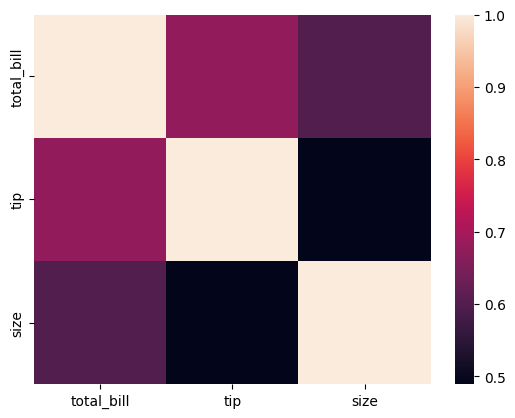

In [57]:
# Heatmap de la matriz de correlacion
sns.heatmap(tips.corr(numeric_only=True))

<Axes: >

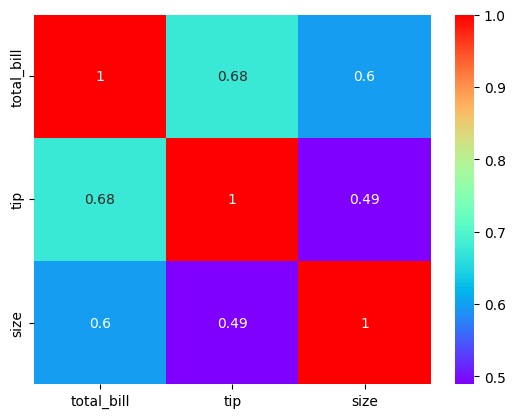

In [58]:
# Cambiando el mapa de colres y agregando las anotaciones a la grafica
sns.heatmap(tips.corr(numeric_only=True),cmap='rainbow',annot=True)

O para los datos de vuelos:

In [59]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [60]:
# Definir una pivot table
flights.pivot_table(values='passengers',index='month',columns='year',observed=True)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

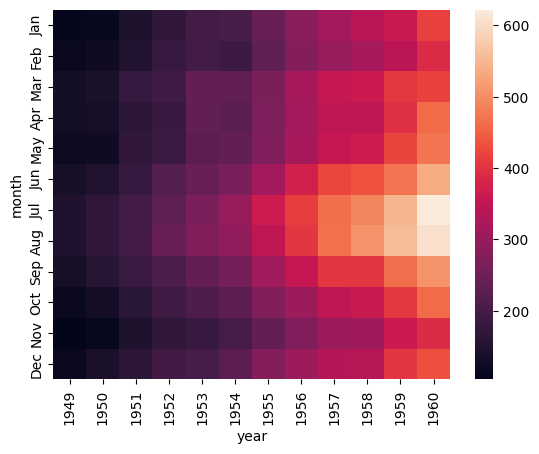

In [61]:
# Graficar la pivot table como un heatmap
pvflights = flights.pivot_table(values='passengers',index='month',columns='year',observed=True)
sns.heatmap(pvflights)

<Axes: xlabel='year', ylabel='month'>

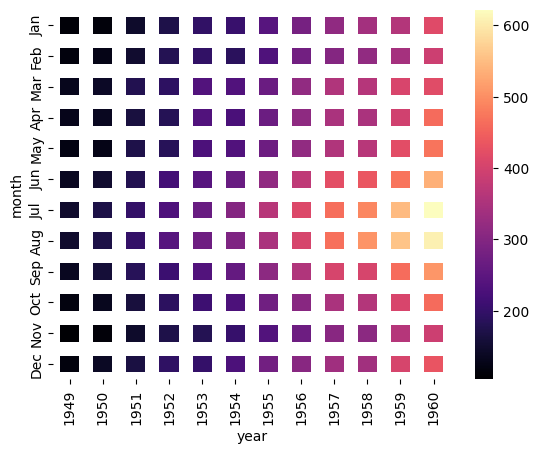

In [62]:
# Cambiando los parametros del colormap y el ancho y color de las lineas de división
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=10)

**clustermap**<br>
El mapa de clúster utiliza la agrupación jerárquica para producir una versión agrupada del mapa de calor. Por ejemplo:

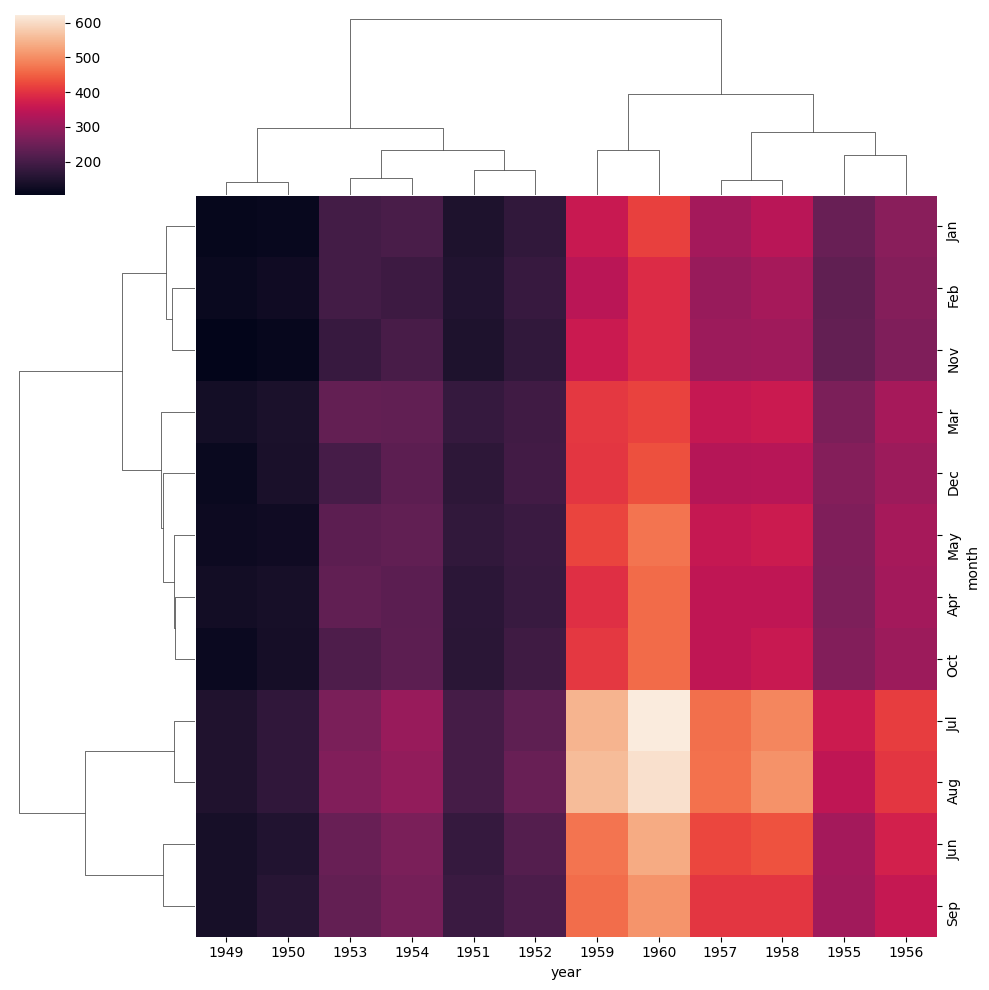

In [63]:
# Gráfica Clustermap de la tabla pivot de los vuelos
sns.clustermap(pvflights)

Observe ahora cómo los años y meses ya no están en orden, en su lugar se agrupan por similitud en el valor (recuento de pasajeros). Eso significa que podemos comenzar a inferir cosas de esta trama, como agosto y julio siendo similares (tiene sentido, ya que ambos son meses de viaje de verano)

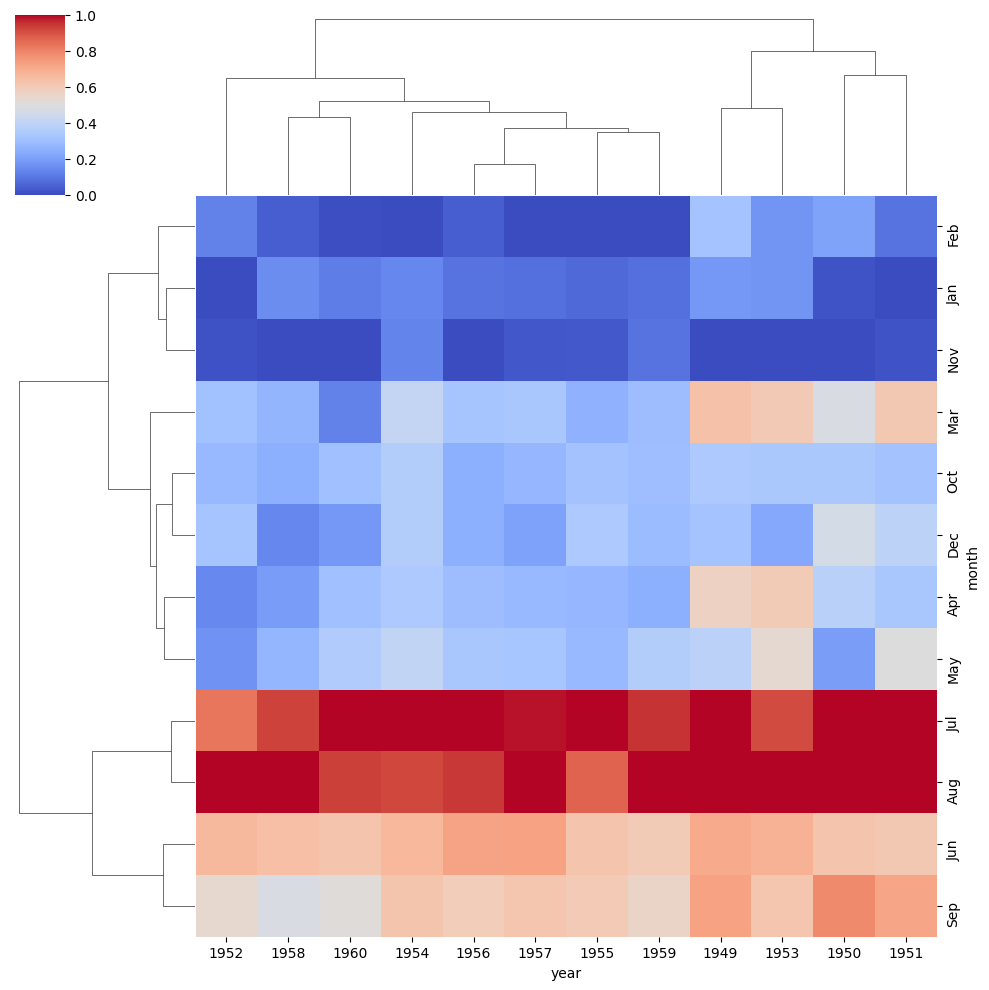

In [64]:
# Más opciones para obtener la información un poco más clara como la normalización
# Cambiar el colormap
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

**Grids**<br>
Las grids son tipos generales de plots que le permiten mapear tipos de plots en filas y columnas de una cuadrícula, esto le ayuda a crear plots similares separadas por características.

In [65]:
# Importar librerias
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris') #Importar el dataset
iris.head() #Ver los primeros 5 elementos de la tabla

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**PairGrid**<br>
Pairgrid es un subplot grid para graficar relaciones por pares en un conjunto de datos.

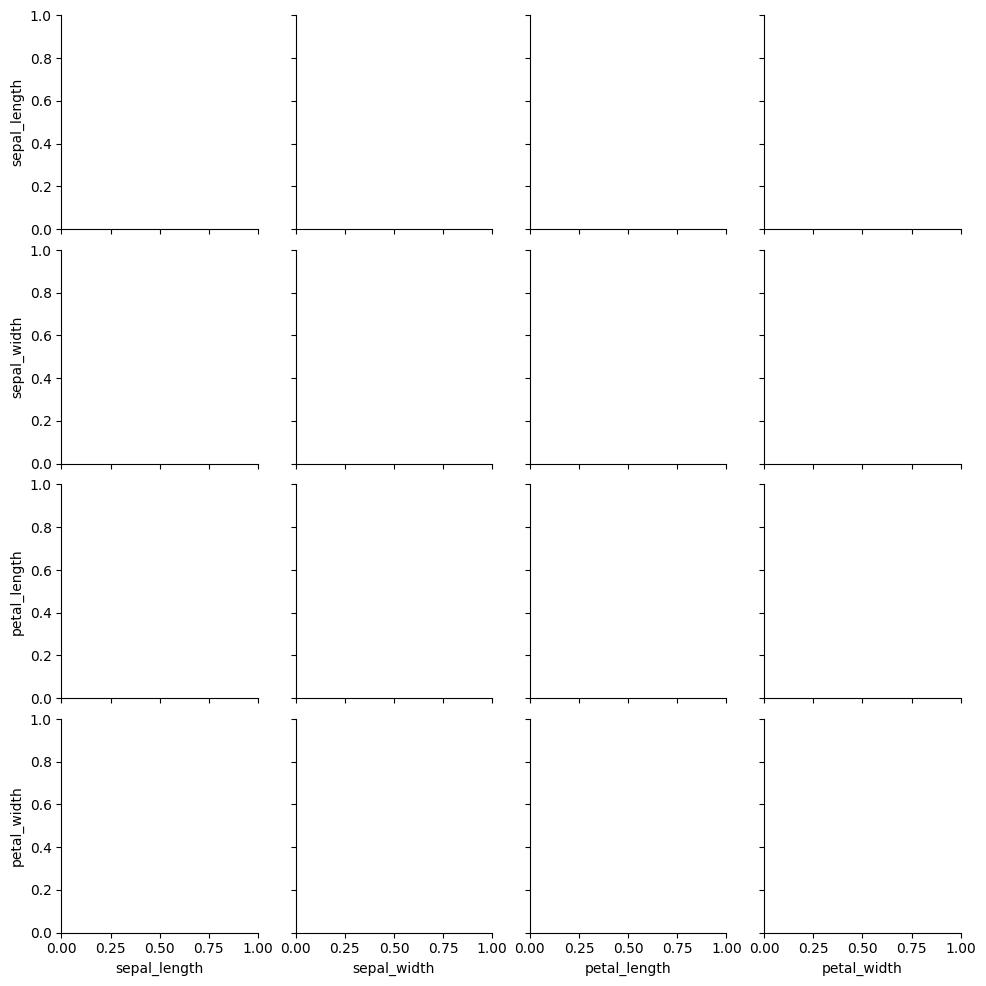

In [66]:
# solo el Grid
sns.PairGrid(iris)

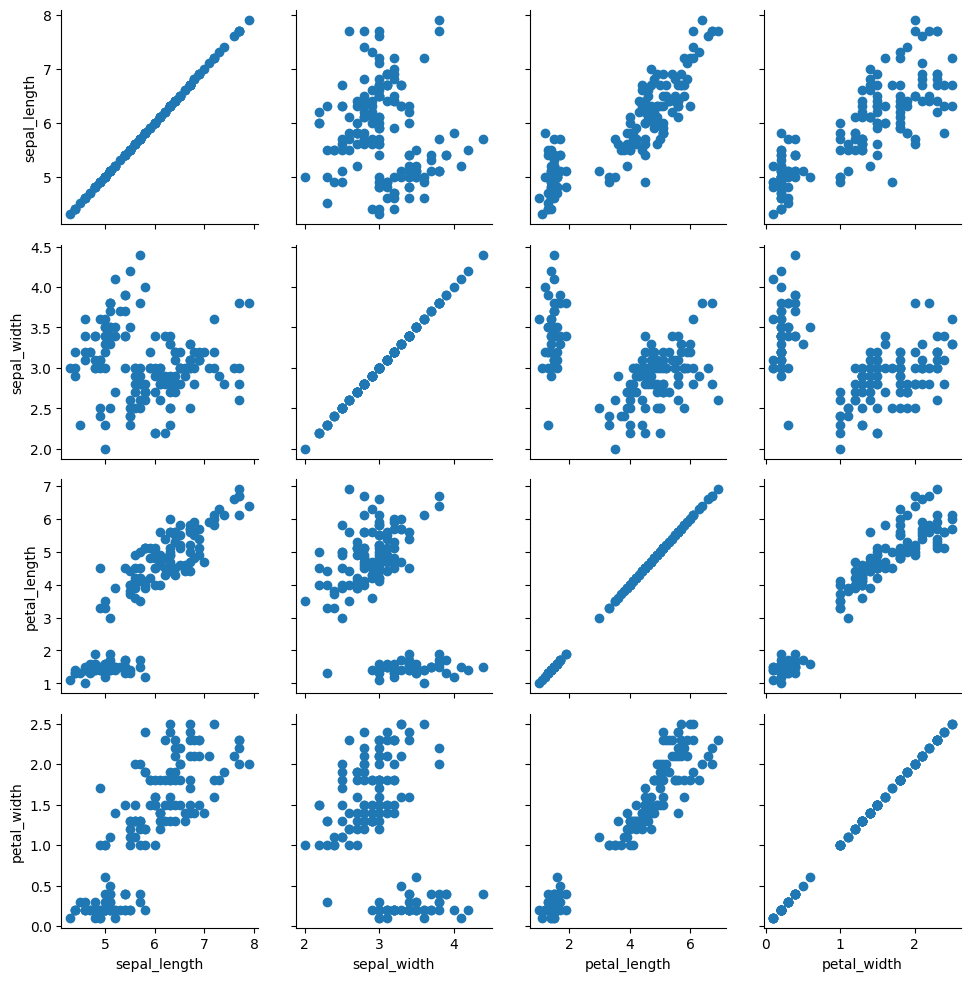

In [67]:
# Ahora se mapea el grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

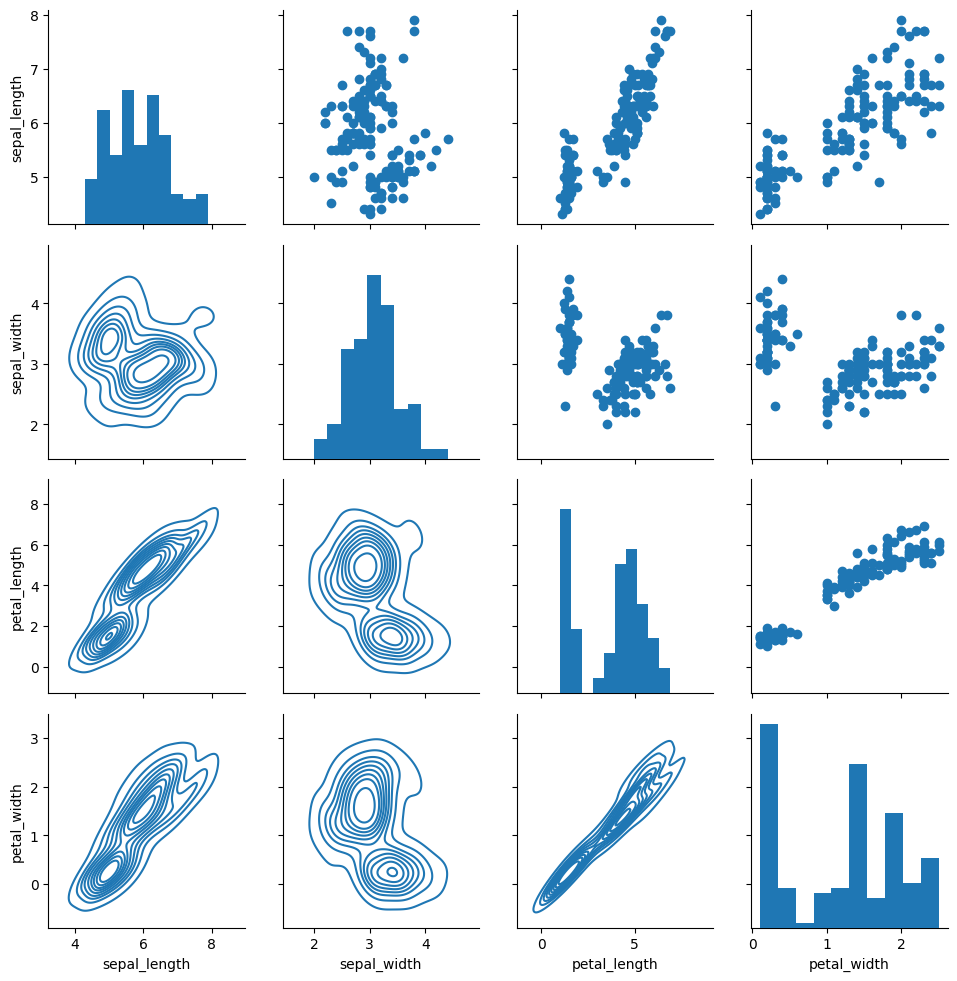

In [68]:
# Mapear a arriba, abajo y diagonal
g = sns.PairGrid(iris) # crear una cuadricula
g.map_diag(plt.hist) #Histogramas en la diagonal
g.map_upper(plt.scatter) # Scatter plots en la parte superior
g.map_lower(sns.kdeplot); # Plots de densidad kde en la parte inferior

**pairplot**<br>
pairplot es una versión más simple de PairGrid (se usa con bastante frecuencia)

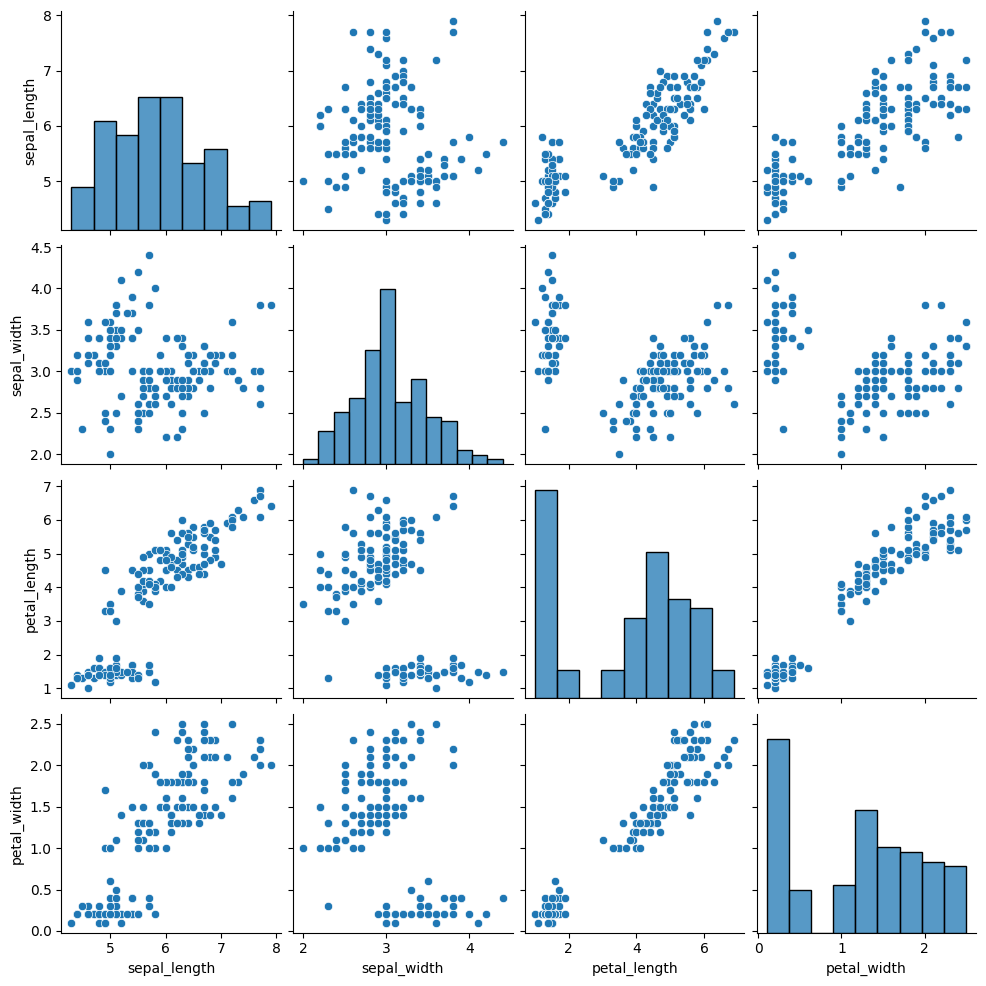

In [69]:
# La diagonal es un histograma
# las otras graficas son scatter plots
sns.pairplot(iris)

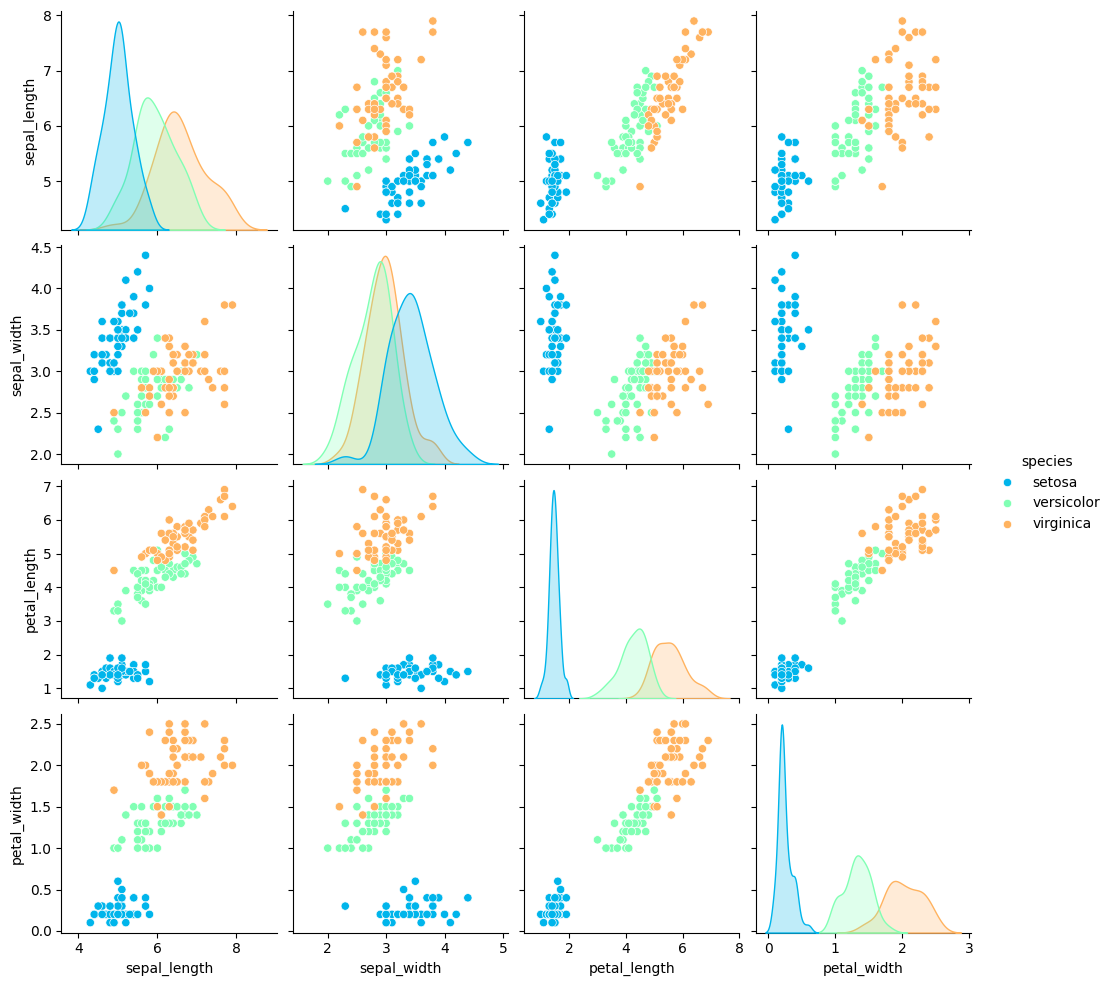

In [70]:
# la diagonal son kde de los datos categoricos
# las otars graficas son scatter plots
sns.pairplot(iris,hue='species',palette='rainbow')

**Facet Grid**<br>
FacetGrid es la forma general de crear grids de plots basados en dos caracteristica:

In [71]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


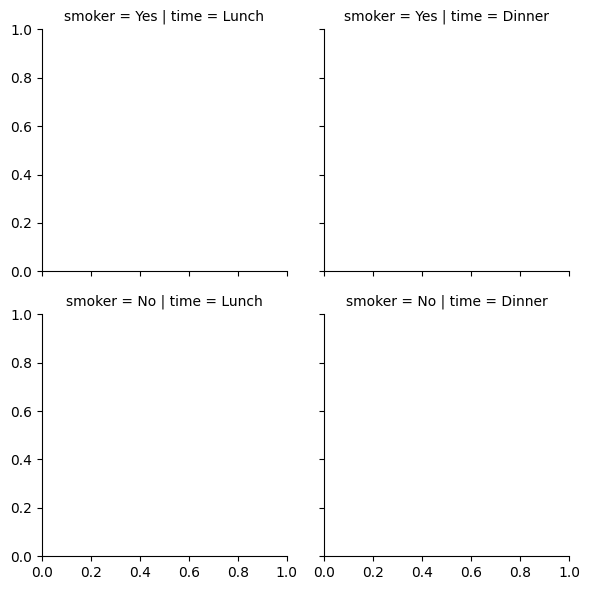

In [72]:
# Sólo el Grid
g = sns.FacetGrid(tips, col="time", row="smoker");

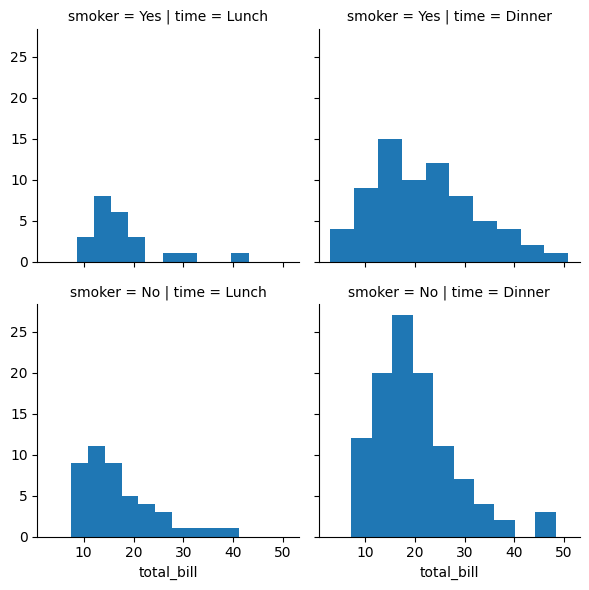

In [73]:
# histogramas entre las dos variables
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

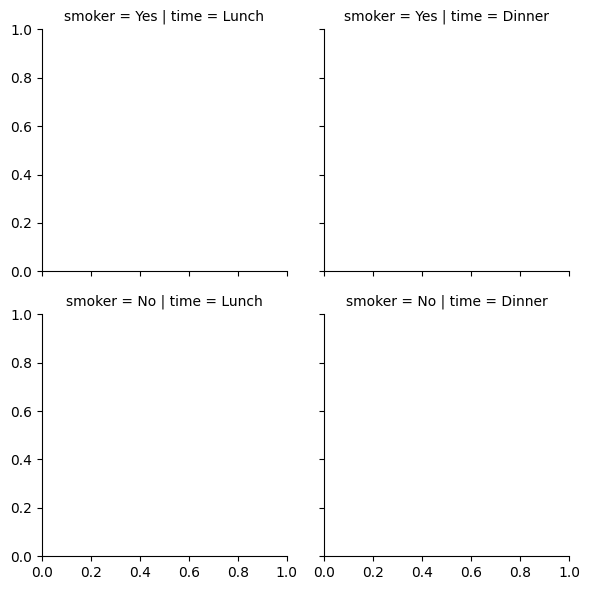

In [74]:
# Scatterplots
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')

In [75]:
# Observe como los argumentos vienen despues de llamar a plt.scatter
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

**JointGrid**<br>
JointGrid es la version general de jointplot()

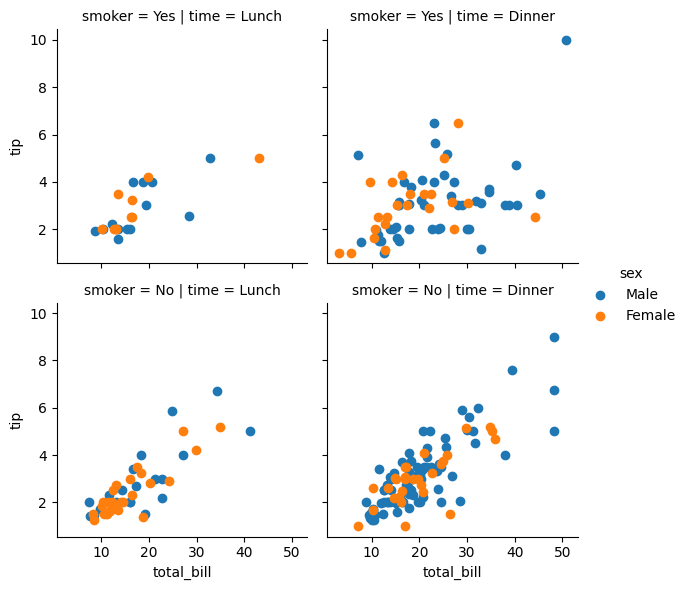

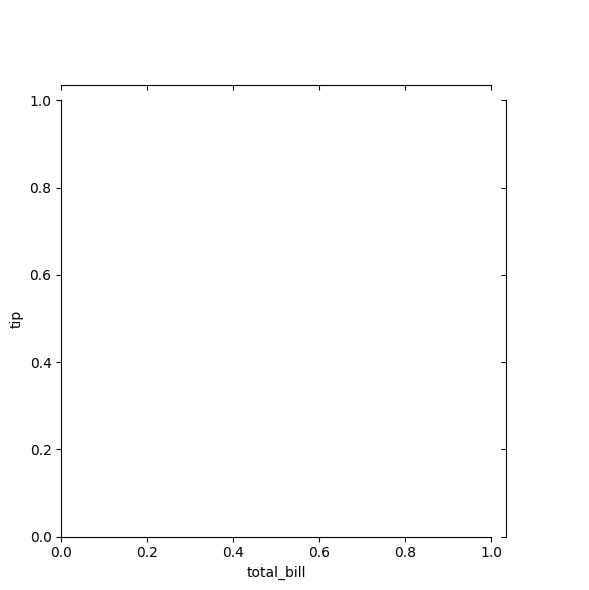

In [76]:
# Solo el grid
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

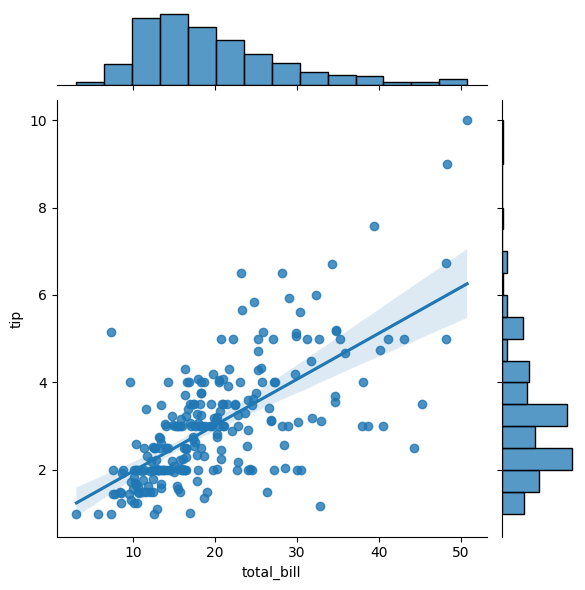

In [77]:
# Grafica de regresion y histograma con kde
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.histplot)

**Plots de Regresión**<br>
Seaborn tiene muchas capacidades integradas para trazados de regresión, lmplot le permite visualizar modelos lineales, pero también le permite dividir los gráficos en función de las características, así como también colorear el tono (hue) en función de las características.

In [78]:
tips = sns.load_dataset('tips') # importar el dataset
tips.head() # ver los primeros datos del dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


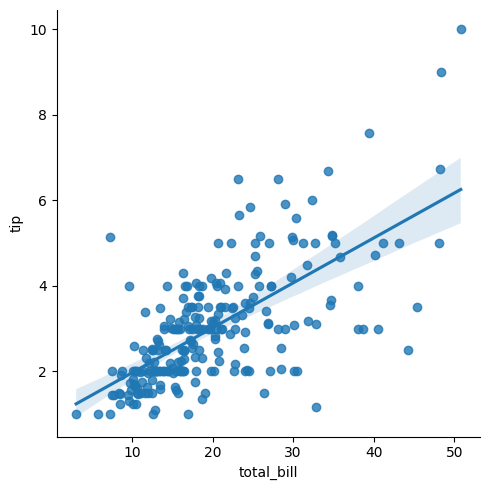

In [79]:
# lmplot()
#scatter plot mas la regresion lineal
sns.lmplot(x='total_bill',y='tip',data=tips);

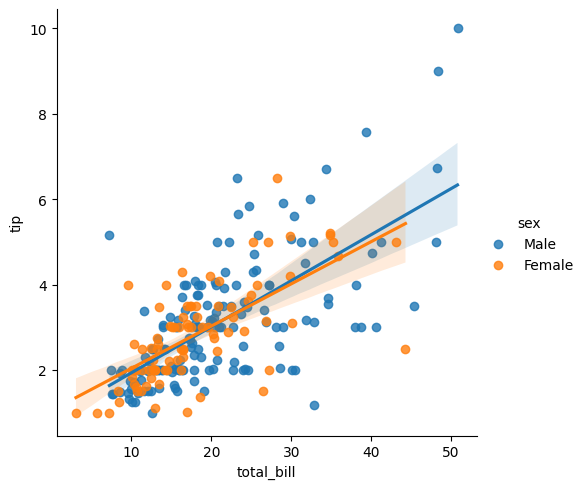

In [80]:
#scatter plot mas la regresion lineal basado en el genero
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex');

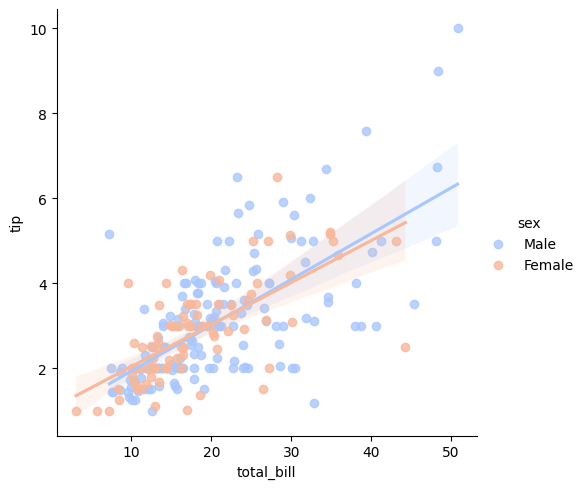

In [81]:
# Cambio de paleta de colores
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm');

**Usando Marcadores**<br>
Los argumentos kwargs lmplot pasan a regplto que es una forma más general de lmplot(). regplot tiene un parámetro scatter_kws que se pasa a plt.scatter y puede modificar los parametros.

Mire siempre la documentacion http://matplotlib.org/api/markers_api.html

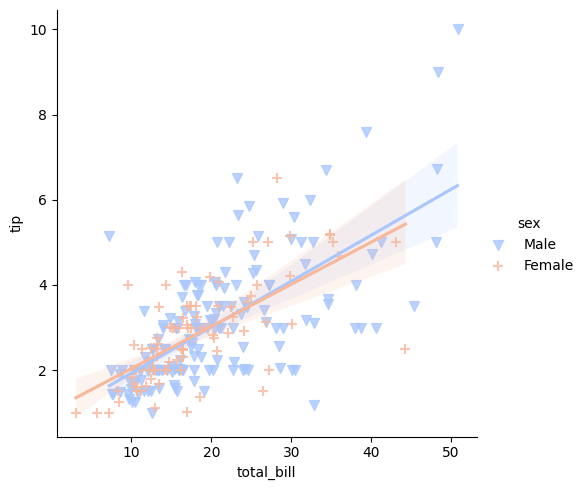

In [82]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',markers=['v','+'],scatter_kws={'s':50})

**Usando un Grid**<br>
Podemos agregar una separación más variable a través de columnas y filas con el uso de un grid. Simplemente indícandolo en los argumentos col o row:

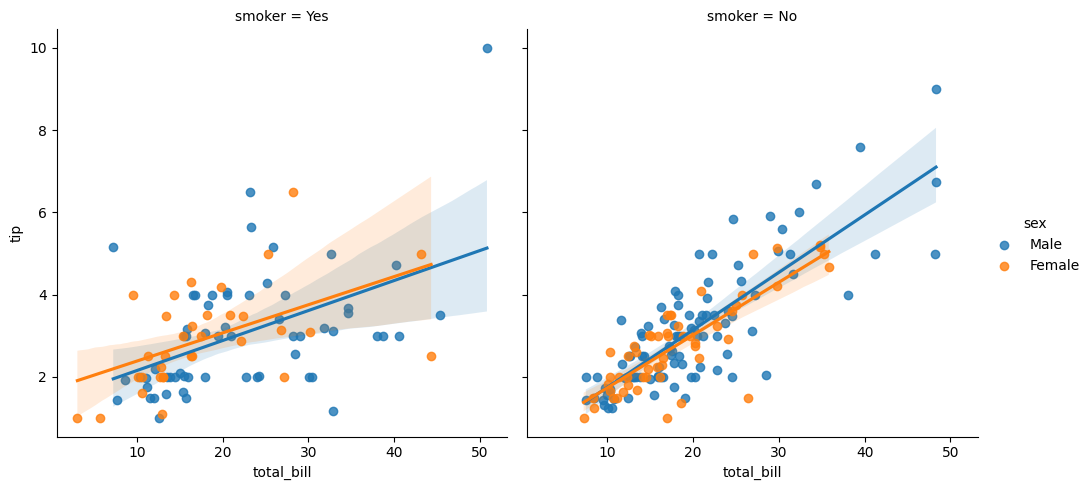

In [83]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='smoker', hue='sex') #hace una division por el genero

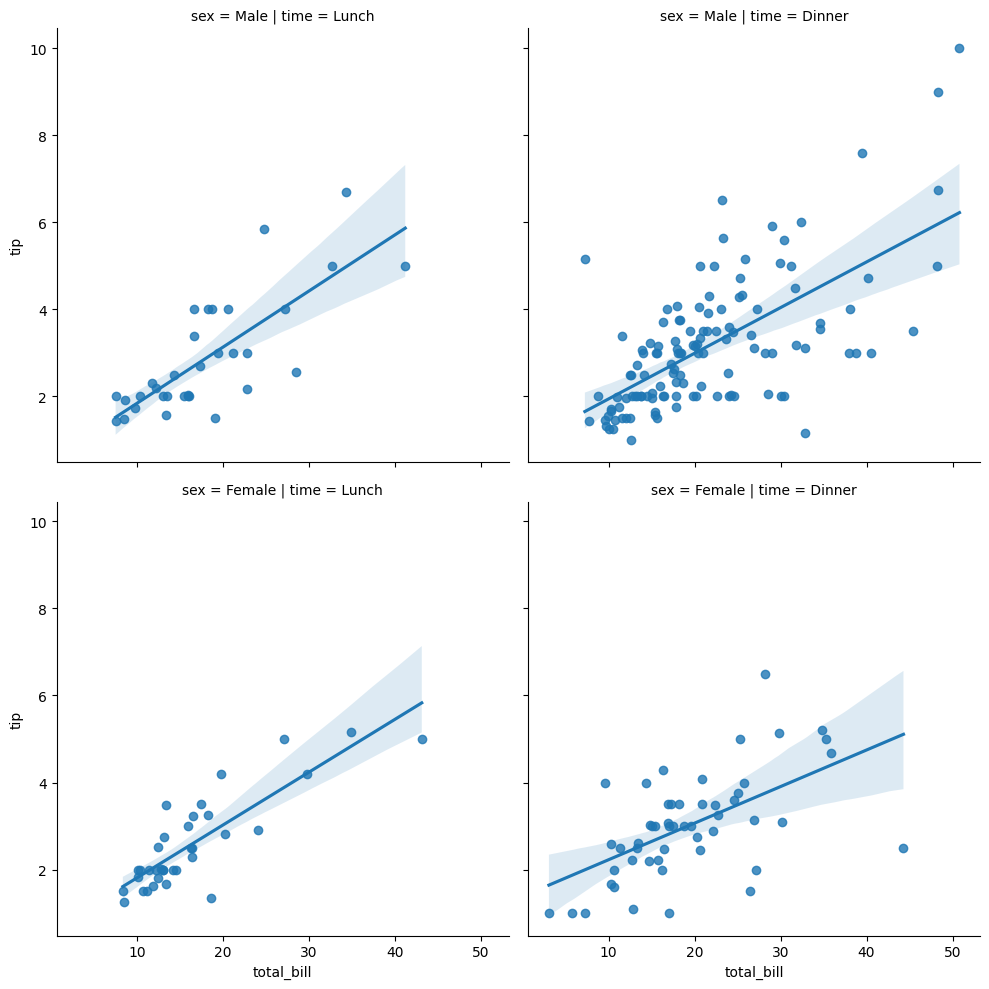

In [84]:
# División por el género y por tiempo de almuerzo o cena
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

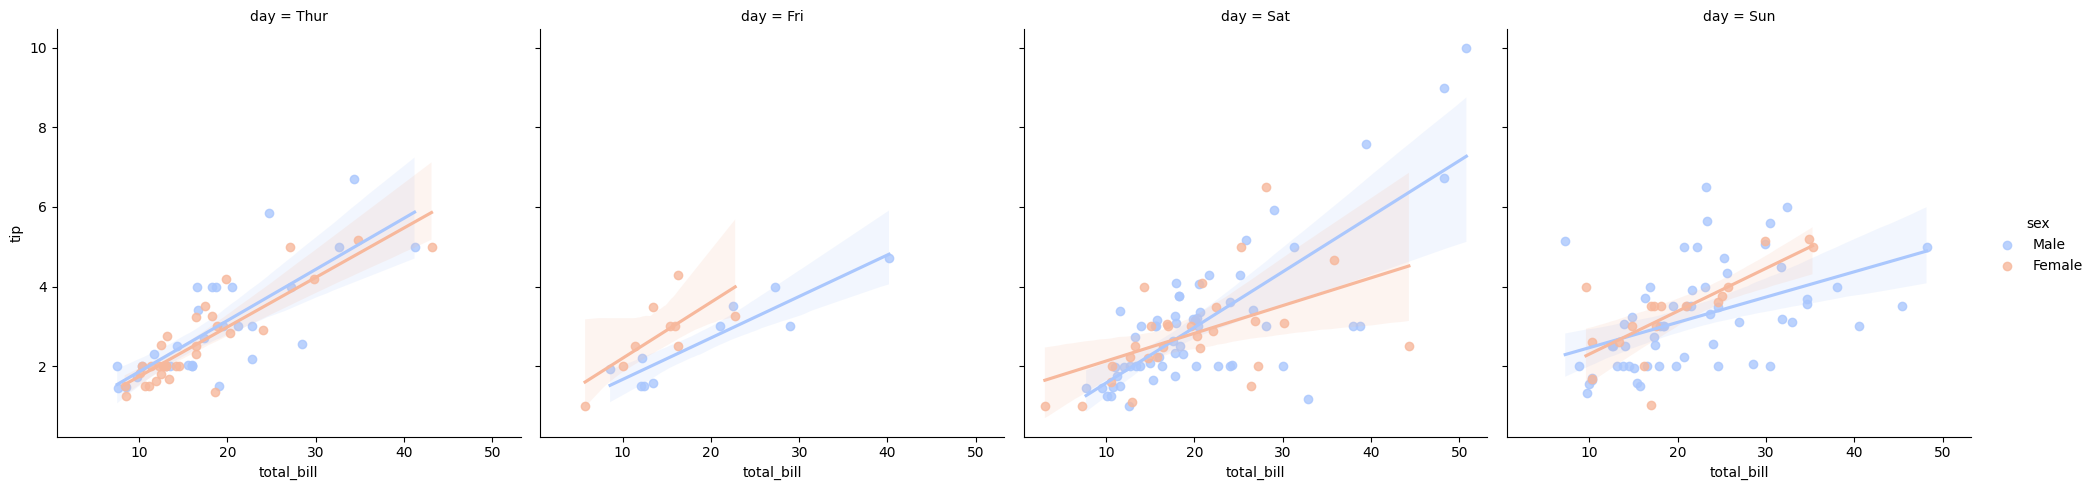

In [85]:
# información del genero en HUE
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

**Aspecto y Tamaño**<br>
Las figuras de Seaborn se les puede ajustar su tamaño y relación de aspecto con los parámetros height y aspect:

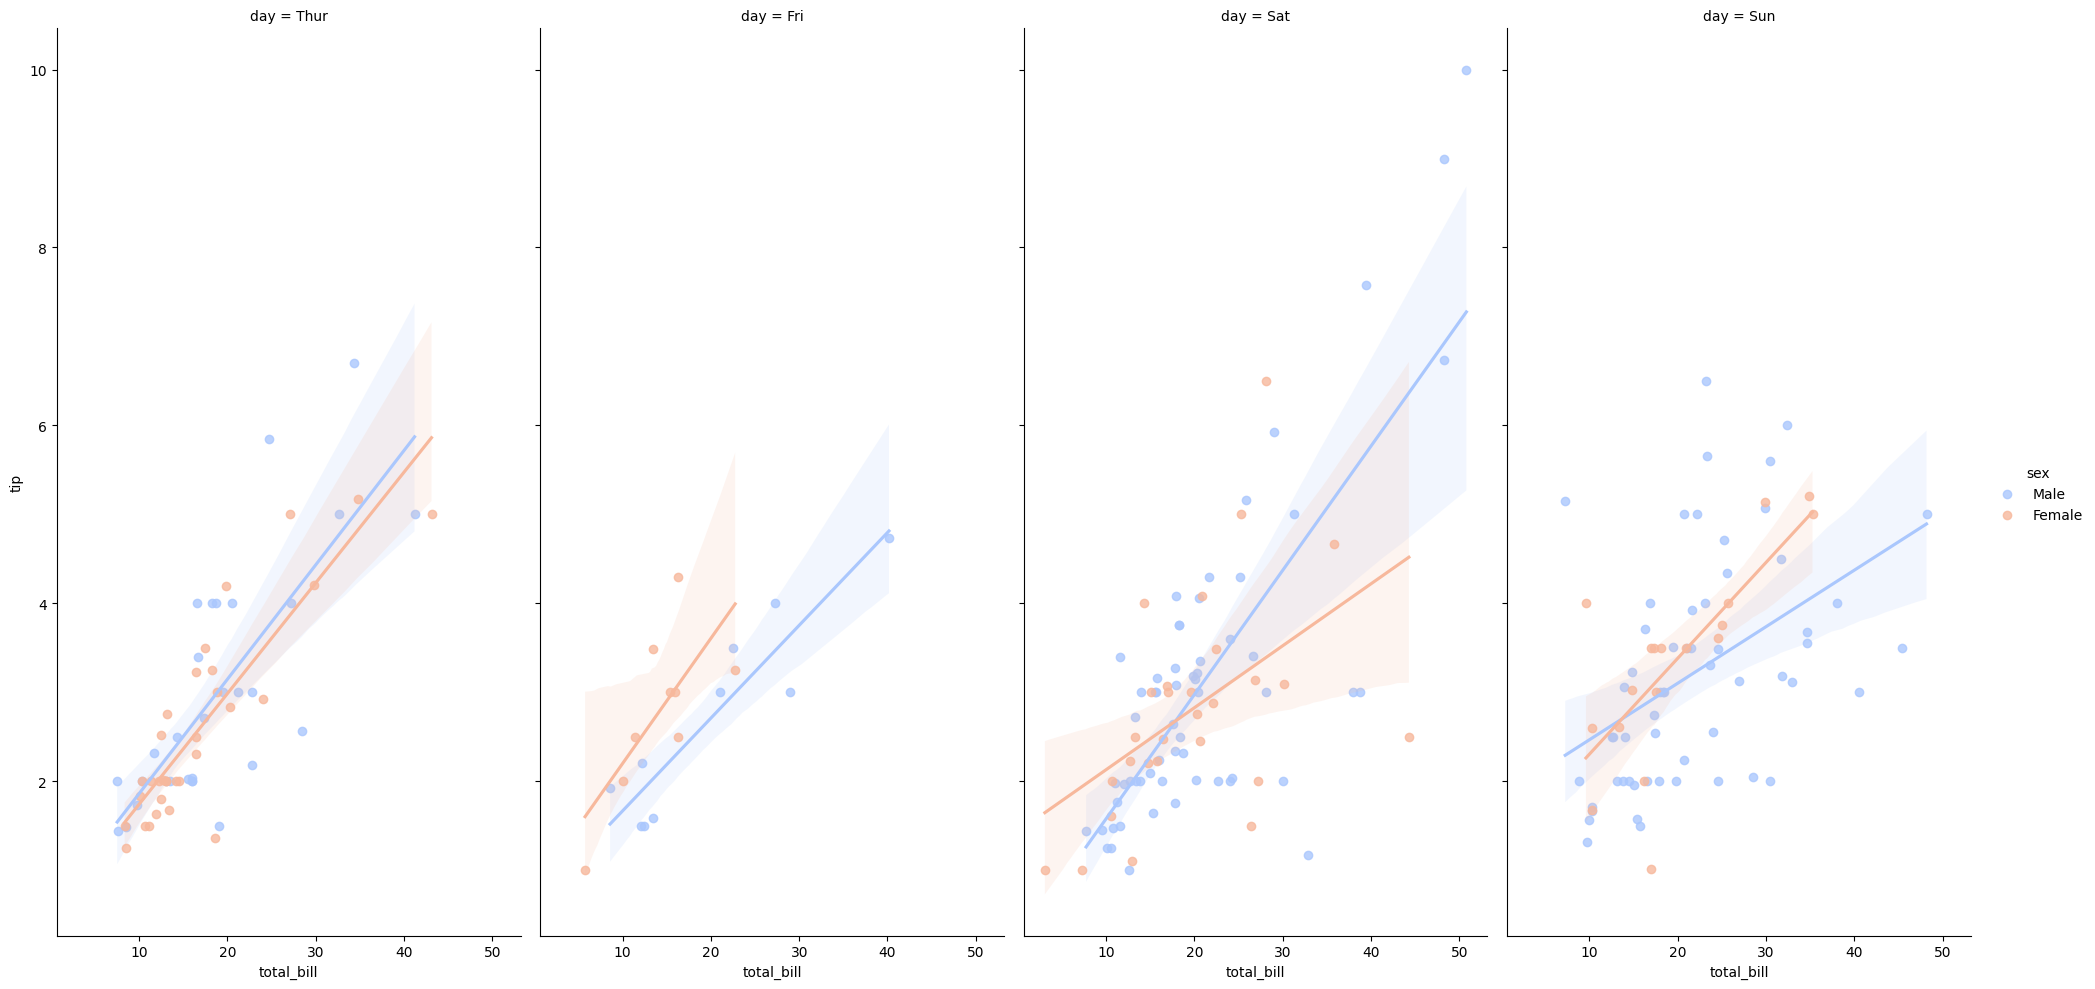

In [86]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',aspect=0.50,height=10)